In [306]:
import numpy as np
import pandas as pd


In [307]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/db3a803512b2c2ee51e818f2a9a12223ff2bf356/chapter-02-car-price/data.csv")
data.index

RangeIndex(start=0, stop=11914, step=1)

In [308]:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [309]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

#### Making sure variable names and values have consistent letter casing

In [310]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [311]:
string = ["make", "model", "engine_fuel_type", "transmission_type", "driven_wheels", "market_category", "vehicle_size", "vehicle_style"]  
for col in string:
    data[col] = data[col].str.lower().str.replace(' ','_')
data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


## Exploratory Data Analysis, getting to understand the data

In [312]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [313]:
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### looking at the price distribution (if it has a tail or not)

<Axes: xlabel='msrp', ylabel='Count'>

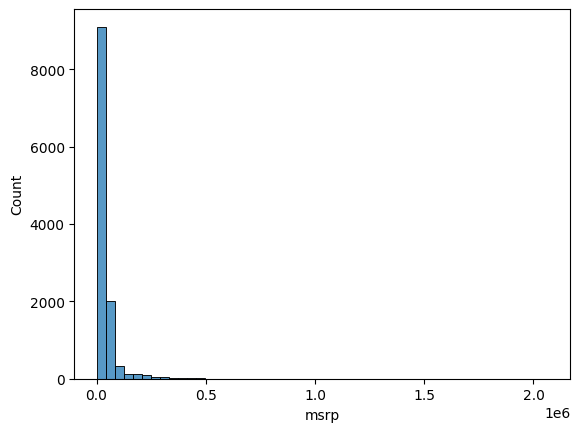

In [314]:
import seaborn as sns

sns.histplot(data.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

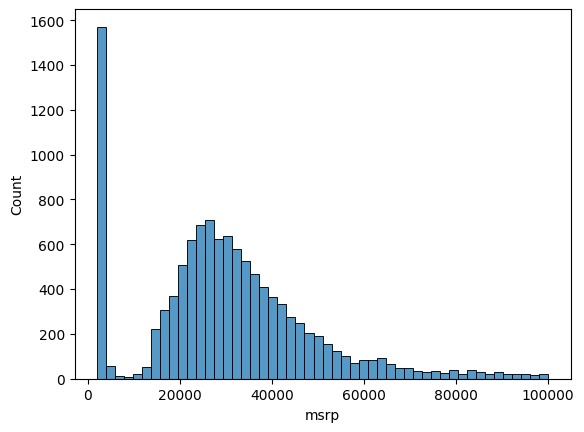

In [315]:
sns.histplot(data.msrp[data.msrp<100000], bins=50) # so it has a long tail, I am going to apply log +1 to remove this tail

<Axes: xlabel='msrp', ylabel='Count'>

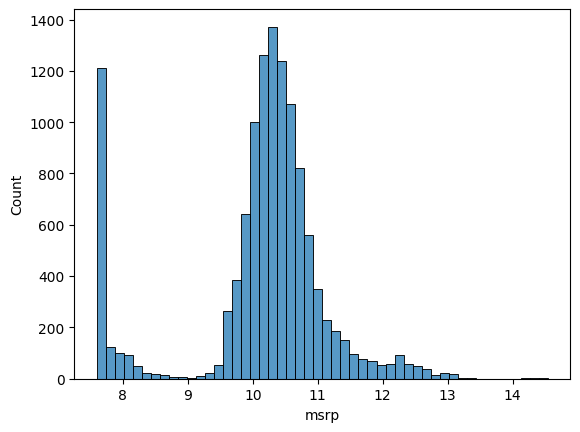

In [316]:
price_log = np.log1p(data.msrp)
sns.histplot(price_log, bins=50) # trying to see if this gives us a normal distribution, and it is better, so this will be applied later

### Setting a validation framework (train 60%, validation 20%, test 20%)

In [317]:
n = len(data)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n-n_train-n_val


idx = np.arange(n) # this variable is going to help with shuffling the data, because the model may become biased if the data is not shuffled
np.random.seed(2)  # helps to get a consistent random value every time the code is run
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [318]:
df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test), len(df_train) + len(df_val) +len(df_test), len(data) 

(7148, 2382, 2384, 11914, 11914)

In [319]:
df_train.head(5) # we have to adress the randomness on the index 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [320]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [321]:

y_train = np.log1p(df_train.msrp) # now applying the log +1 we talked about earlier
y_val = np.log1p(df_val.msrp)
y_test = np.log1p(df_test.msrp)


del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [322]:
features =['engine_hp','engine_cylinders','popularity','highway_mpg','city_mpg']


In [323]:
def prepare_x(df): # this will help us tranform our data
    df = df.copy() #so we don't change the original data
    
    df = df[features]
    df = df.fillna(0)
    x=df.values

    return x
    

### Linear regression (matrix-matrix multiplication or dot product), without regularization 

In [324]:
def train_model(x,y):
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])  # adding a column of 1s so the model can learn the intercept term
    XT = x.T
    XTX =XT.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    wfull = XTX_inv.dot(XT).dot(y)

    return wfull[0],wfull[1:]


### Root Mean Square Error

In [325]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    rmse = np.sqrt(se.mean())

    return rmse

## checking the model

In [326]:
x_train = prepare_x(df_train)
w0,w = train_model(x_train,y_train)

y_pred = w0 + x_train.dot(w)
rmse(y_train,y_pred)

np.float64(0.7554591756909307)

### using the validation data

In [327]:
x_train = prepare_x(df_train)
w0,w = train_model(x_train,y_train)

x_val = prepare_x(df_val)
y_pred_val = w0 + x_val.dot(w)
rmse(y_val,y_pred_val) ## the model is bad for now, we will add other variables to see if the performance will improve

np.float64(0.761829753572965)

<Axes: xlabel='msrp', ylabel='Count'>

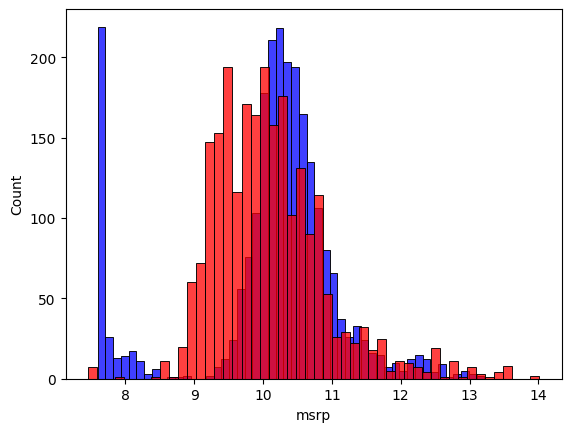

In [328]:
sns.histplot(y_val,bins=50,color='blue')
sns.histplot(y_pred_val,bins=50,color='red')

### Simple feature engineering, lets add the age to see the model performance

In [329]:

def prepare_x(df): # this will help us tranform our data
    df = df.copy() #so we don't change the original data
    df['age'] = 2017 + df.year
    base = features + ['age']
    df = df[base]
    df = df.fillna(0)
    x=df.values

    return x
    

In [330]:
x_train = prepare_x(df_train)
w0,w = train_model(x_train,y_train)

x_val = prepare_x(df_val)
y_pred_val = w0 + x_val.dot(w)
rmse(y_val,y_pred_val) ## there is an increase in the performance, thats good, we are going to add other variabels now, starting with the num of door

np.float64(0.5171097946675025)

### Adding categorical variables to see if the model is better

In [331]:
data.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [332]:
def prepare_x(df): # this will help us tranform our data
    df = df.copy() #so we don't change the original data
    df['age'] = 2017 + df.year
    base = features + ['age']

    for num in [2,3,4]:
        df['num_door_%s'%num] = (df.number_of_doors == num).astype("int")
        base.append('num_door_%s'%num)
    df = df[base]
    df = df.fillna(0)
    x=df.values

    return x

In [333]:
x_train = prepare_x(df_train)
w0,w = train_model(x_train,y_train)

x_val = prepare_x(df_val)
y_pred_val = w0 + x_val.dot(w)
rmse(y_val,y_pred_val) # only a slight decrease, lets add other categorical variable

np.float64(0.515715868491686)

In [334]:
category = {}

category_var= ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
               'market_category', 'vehicle_size', 'vehicle_style']

for c in category_var:
    category[c]= list(df_train[c].value_counts().head().index) # we are taking only the first 5
    
category

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [335]:
def prepare_x(df): # this will help us tranform our data
    df = df.copy() #so we don't change the original data
    df['age'] = 2017 + df.year
    base = features + ['age']

    for num in [2,3,4]:
        df['num_door_%s'%num] = (df.number_of_doors == num).astype("int")
        base.append('num_door_%s'%num)
    for c , values in category.items():
        for v in values:
            df["%s_%s" %(c,v)]= (df[c] == v).astype("int")
            base.append('%s_%s'%(c,v))
        
    df = df[base]
    df = df.fillna(0)
    x=df.values

    return x

In [336]:
x_train = prepare_x(df_train)
w0,w = train_model(x_train,y_train)

x_val = prepare_x(df_val)
y_pred_val = w0 + x_val.dot(w)
rmse(y_val,y_pred_val) # now we have to regularize

np.float64(31.055143458461057)

### regularization

In [337]:
def train_model_reg(x,y, r):# this stabulises the matrix after the feature engineering
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])  
    XT = x.T
    XTX =XT.dot(x)
    XTX = XTX + r * np.eye(XTX.shape[0]) 
    XTX_inv = np.linalg.inv(XTX)
    wfull = XTX_inv.dot(XT).dot(y)

    return wfull[0],wfull[1:]


In [338]:
x_train = prepare_x(df_train)
w0,w = train_model_reg(x_train,y_train,r=0.001)

x_val = prepare_x(df_val)
y_pred_val = w0 + x_val.dot(w)
rmse(y_val,y_pred_val) # better RMSE, now we can use the model

np.float64(0.4578251161132772)

### Using the Model

In [339]:
df_full_train = pd.concat([df_train,df_val])
df_full_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,bmw,7_series,2015,premium_unleaded_(required),445.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,high-performance",large,sedan,25,17,3916
9526,volvo,xc90,2017,premium_unleaded_(recommended),316.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",large,4dr_suv,25,20,870
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238


In [340]:
y_full_train = np.concatenate([y_train, y_val])

In [341]:
x_full_train = prepare_x(df_full_train)
w0,w = train_model_reg(x_full_train,y_full_train,r=0.001)

x_test= prepare_x(df_test)
y_pred_test = w0 + x_test.dot(w)
rmse(y_test,y_pred_test)

np.float64(0.4521287176975872)

<Axes: xlabel='msrp', ylabel='Count'>

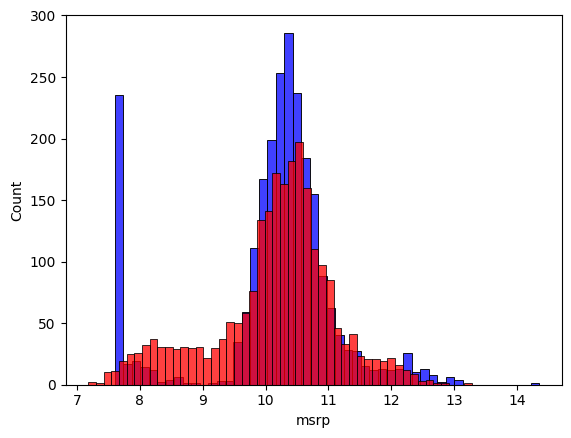

In [346]:
sns.histplot(y_test,bins=50,color='blue')
sns.histplot(y_pred_test,bins=50,color='red')

### lets predict a car from the test data 

In [359]:
car = df_test.iloc[30]
car

make                                                  audi
model                                                tt_rs
year                                                  2012
engine_fuel_type               premium_unleaded_(required)
engine_hp                                            360.0
engine_cylinders                                       5.0
transmission_type                                   manual
driven_wheels                              all_wheel_drive
number_of_doors                                        2.0
market_category      factory_tuner,luxury,high-performance
vehicle_size                                       compact
vehicle_style                                        coupe
highway_mpg                                             25
city_mpg                                                18
popularity                                            3105
Name: 30, dtype: object

In [360]:
df_car = pd.DataFrame([car])
df_car

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
30,audi,tt_rs,2012,premium_unleaded_(required),360.0,5.0,manual,all_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,25,18,3105


In [361]:
x_car = prepare_x(df_car)

y_car = w0 + x_car.dot(w)
np.expm1(y_car[0])


np.float64(47528.53358947966)

In [362]:
np.expm1(y_test[30]) # the model can be better 

np.float64(56849.999999999956)